In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

DATA_SILVER = Path("data/silver")

type_eff = pd.read_csv(DATA_SILVER / "type_effectiveness.csv")
type_eff.head()

,attacking_type,defending_type,multiplier
0,bug,bug,1.0
1,bug,dark,2.0
2,bug,dragon,1.0
3,bug,electric,1.0
4,bug,fairy,0.5


In [2]:
eff_matrix = type_eff.pivot_table(
    index="attacking_type",
    columns="defending_type",
    values="multiplier",
    aggfunc="first"
)

eff_matrix

defending_type,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,shadow,steel,stellar,unknown,water
attacking_type,,,,,,,,,,,,,,,,,,,,,
bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,1.0,0.5,1.0,1.0,1.0
dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0
fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0
fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,0.5
flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,1.0
ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
offensive_by_type = (
    type_eff
    .groupby("attacking_type")["multiplier"]
    .mean()
    .rename("expected_offensive_multiplier")
    .reset_index()
    .sort_values("expected_offensive_multiplier", ascending=False)
)

offensive_by_type

,attacking_type,expected_offensive_multiplier
10,ground,1.142857
15,rock,1.119048
6,fire,1.095238
11,ice,1.095238
7,flying,1.071429
20,water,1.071429
5,fighting,1.071429
4,fairy,1.071429
17,steel,1.047619
8,ghost,1.023810


In [4]:
top_offensive_types = offensive_by_type.head(10)
top_offensive_types

,attacking_type,expected_offensive_multiplier
10,ground,1.142857
15,rock,1.119048
6,fire,1.095238
11,ice,1.095238
7,flying,1.071429
20,water,1.071429
5,fighting,1.071429
4,fairy,1.071429
17,steel,1.047619
8,ghost,1.023810


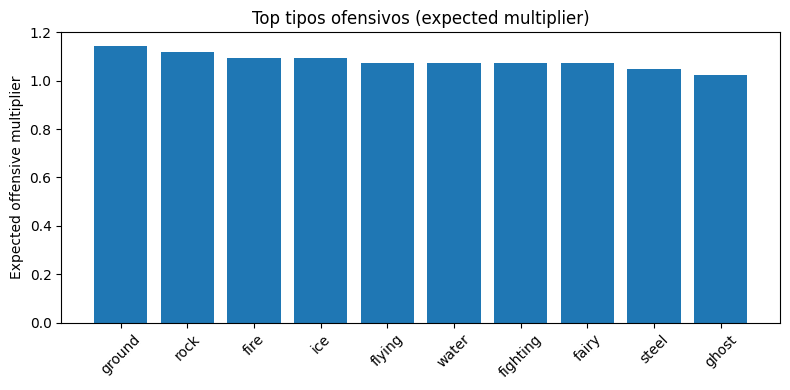

In [5]:
plt.figure(figsize=(8, 4))
plt.bar(top_offensive_types["attacking_type"], top_offensive_types["expected_offensive_multiplier"])
plt.xticks(rotation=45)
plt.ylabel("Expected offensive multiplier")
plt.title("Top tipos ofensivos (expected multiplier)")
plt.tight_layout()
plt.show()

In [6]:
worst_offensive_types = offensive_by_type.sort_values(
    "expected_offensive_multiplier",
    ascending=True
).head(10)

worst_offensive_types

,attacking_type,expected_offensive_multiplier
12,normal,0.904762
13,poison,0.952381
0,bug,0.976190
2,dragon,0.976190
3,electric,0.976190
9,grass,0.976190
19,unknown,1.000000
18,stellar,1.000000
16,shadow,1.000000
14,psychic,1.000000


In [7]:
defensive_by_type = (
    type_eff
    .groupby("defending_type")["multiplier"]
    .mean()
    .rename("expected_defensive_multiplier")
    .reset_index()
    .sort_values("expected_defensive_multiplier", ascending=True)  # menor es mejor
)

defensive_by_type

,defending_type,expected_defensive_multiplier
17,steel,0.857143
8,ghost,0.952381
3,electric,0.976190
4,fairy,0.976190
13,poison,0.976190
20,water,1.000000
18,stellar,1.000000
16,shadow,1.000000
6,fire,1.000000
19,unknown,1.000000


In [8]:
top_defensive_types = defensive_by_type.head(10)
top_defensive_types

,defending_type,expected_defensive_multiplier
17,steel,0.857143
8,ghost,0.952381
3,electric,0.976190
4,fairy,0.976190
13,poison,0.976190
20,water,1.000000
18,stellar,1.000000
16,shadow,1.000000
6,fire,1.000000
19,unknown,1.000000


In [9]:
offensive_by_type.reset_index(drop=True, inplace=True)
offensive_by_type

,attacking_type,expected_offensive_multiplier
0,ground,1.142857
1,rock,1.119048
2,fire,1.095238
3,ice,1.095238
4,flying,1.071429
5,water,1.071429
6,fighting,1.071429
7,fairy,1.071429
8,steel,1.047619
9,ghost,1.023810


In [10]:
defensive_by_type.reset_index(drop=True, inplace=True)
defensive_by_type

,defending_type,expected_defensive_multiplier
0,steel,0.857143
1,ghost,0.952381
2,electric,0.976190
3,fairy,0.976190
4,poison,0.976190
5,water,1.000000
6,stellar,1.000000
7,shadow,1.000000
8,fire,1.000000
9,unknown,1.000000


In [11]:
from pathlib import Path

DATA_GOLD = Path("data/gold")
DATA_GOLD.mkdir(parents=True, exist_ok=True)

offensive_by_type.to_csv(DATA_GOLD / "type_offensive_ranking.csv", index=False)
defensive_by_type.to_csv(DATA_GOLD / "type_defensive_ranking.csv", index=False)